In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('001.jpg')  # Update the path to your image

# Find the coordinates of the whitest pixel
coordinates = np.unravel_index(np.argmax(img), img.shape)

# Print the coordinates
print(f"White color coordinates: {coordinates}")


White color coordinates: (474, 1075, 2)


(<Axes: >, <matplotlib.image.AxesImage at 0x7f145ddca7d0>)

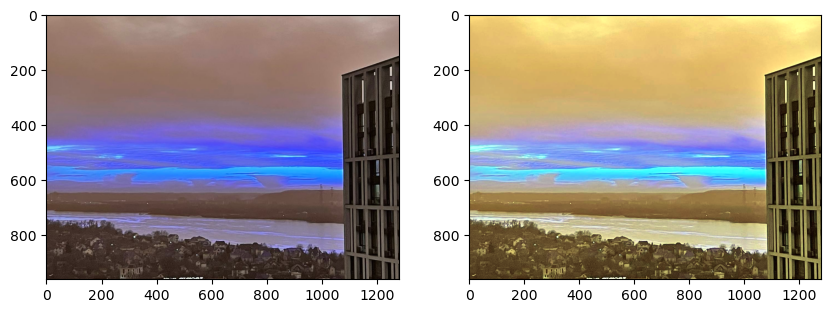

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img_path = '001.jpg'  
img = cv2.imread(img_path)

# Specify the coordinates of the white patch
row, col = 474, 1075

# Extract the color values of the white patch
white = img[row, col, :]

# Calculate scaling coefficients
coeffs = 255.0 / white

# Apply white balancing and generate a balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# Normalize the balanced image to the range [0, 1]
balanced = balanced / 255

# Clip values greater than 1 to preserve dynamic range
balanced[balanced > 1] = 1

# Display the original and balanced images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)